# 상권정보 시각화

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import pearsonr
#환경 설정
plt.rcdefaults()
plt.rcParams["font.family"] = 'Haansoft Dotum'
plt.rcParams['axes.unicode_minus'] = False
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [14]:
# Input DataFrame에 시계열 column을 추가한 새로운 DataFrame을 생성하는 함수

def date_data(df):
    # 연도, 분기 추출
    year = list(df['기준_년_코드'])
    month = list(df['기준_분기_코드'])
    
    # (연도, 분기) list 생성
    year_month = [i for i in zip(year,month)]
    
    # '연도_분기' list 생성
    # 1분기 = 3월 1일, 2분기 = 6월 1일, 3분기 = 9월 1일, 4분기 = 12월 1일
    y_m = []
    for i in range(len(year_month)):
        month = ''
        if int(year_month[i][1]) == 1:
            month = 3
        elif int(year_month[i][1]) == 2:
            month = 6
        elif int(year_month[i][1]) == 3:
            month = 9
        else :
            month = 12
        a = str(int(year_month[i][0])) + '-' + str(month) + '-1'
        y_m.append(a)
        
        
    # 'Date' columne이 추가된 새로운 데이터프레임 생성

    df_date = fluid_m.copy()
    df_date['Date'] = y_m
    df_date['Date'] = df_date['Date'].astype('datetime64[ns]')
    df_date = df_date.set_index('Date')
    return df_date

## 1. 데이터 불러오기

In [2]:
#df_fluid = pd.read_csv('./OSSP/data/서울시 우리마을가게 상권분석서비스(상권-추정유동인구).csv', encoding = 'cp949')
#df_facil = pd.read_csv('./OSSP/data/서울시 우리마을가게 상권분석서비스(상권-집객시설).csv', encoding = 'cp949')
#df_work = pd.read_csv('./OSSP/data/서울시 우리마을가게 상권분석서비스(상권-직장인구).csv', encoding = 'cp949')
#df_live = pd.read_csv('./OSSP/data/서울시 우리마을가게 상권분석서비스(상권_상주인구).csv', encoding = 'cp949')

## 2. '명동거리' 상권 정보 시각화 추출
### (1) 유동인구

In [3]:
df_fluid.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,...,여성연령대_60_이상_토요일시간대_3_유동인구_수,여성연령대_60_이상_토요일시간대_4_유동인구_수,여성연령대_60_이상_토요일시간대_5_유동인구_수,여성연령대_60_이상_토요일시간대_6_유동인구_수,여성연령대_60_이상_일요일시간대_1_유동인구_수,여성연령대_60_이상_일요일시간대_2_유동인구_수,여성연령대_60_이상_일요일시간대_3_유동인구_수,여성연령대_60_이상_일요일시간대_4_유동인구_수,여성연령대_60_이상_일요일시간대_5_유동인구_수,여성연령대_60_이상_일요일시간대_6_유동인구_수
0,2020,2,U,관광특구,1001496,강남 마이스 관광특구,90544,46022,44522,4560,...,137,141,130,40,44,89,116,121,105,34
1,2020,2,U,관광특구,1001495,잠실 관광특구,3026454,1479790,1546665,255317,...,5786,6029,7767,4396,7750,6872,5364,5707,7203,4277
2,2020,2,U,관광특구,1001494,종로?청계 관광특구,4033679,2201483,1832196,115098,...,11440,10813,8862,3954,5607,6330,6703,6753,6634,4271
3,2020,2,U,관광특구,1001493,동대문패션타운 관광특구,3262023,1588974,1673049,106459,...,6157,5683,5020,2948,5469,5521,4595,4602,5701,5012
4,2020,2,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3764785,1953028,1811756,72060,...,11146,10284,4876,1250,1664,3381,4498,4510,3148,1109


In [4]:
# 모든 column 확인

list(df_fluid.columns)

['기준_년_코드',
 '기준_분기_코드',
 ' 상권_구분_코드',
 ' 상권_구분_코드_명',
 '상권_코드',
 '상권_코드_명',
 '총_유동인구_수',
 '남성_유동인구_수',
 '여성_유동인구_수',
 '연령대_10_유동인구_수',
 '연령대_20_유동인구_수',
 '연령대_30_유동인구_수',
 '연령대_40_유동인구_수',
 '연령대_50_유동인구_수',
 '연령대_60_이상_유동인구_수',
 '시간대_1_유동인구_수',
 '시간대_2_유동인구_수',
 '시간대_3_유동인구_수',
 '시간대_4_유동인구_수',
 '시간대_5_유동인구_수',
 '시간대_6_유동인구_수',
 '월요일_유동인구_수',
 '화요일_유동인구_수',
 '수요일_유동인구_수',
 '목요일_유동인구_수',
 '금요일_유동인구_수',
 '토요일_유동인구_수',
 '일요일_유동인구_수',
 '남성연령대_10_월요일시간대_1_유동인구_수',
 '남성연령대_10_월요일시간대_2_유동인구_수',
 '남성연령대_10_월요일시간대_3_유동인구_수',
 '남성연령대_10_월요일시간대_4_유동인구_수',
 '남성연령대_10_월요일시간대_5_유동인구_수',
 '남성연령대_10_월요일시간대_6_유동인구_수',
 '남성연령대_10_화요일시간대_1_유동인구_수',
 '남성연령대_10_화요일시간대_2_유동인구_수',
 '남성연령대_10_화요일시간대_3_유동인구_수',
 '남성연령대_10_화요일시간대_4_유동인구_수',
 '남성연령대_10_화요일시간대_5_유동인구_수',
 '남성연령대_10_화요일시간대_6_유동인구_수',
 '남성연령대_10_수요일시간대_1_유동인구_수',
 '남성연령대_10_수요일시간대_2_유동인구_수',
 '남성연령대_10_수요일시간대_3_유동인구_수',
 '남성연령대_10_수요일시간대_4_유동인구_수',
 '남성연령대_10_수요일시간대_5_유동인구_수',
 '남성연령대_10_수요일시간대_6_유동인구_수',
 '남성연령대_10_목요일시간대_1_유동인구_수',
 '남성연령대_10_목요

In [5]:
# 필요한 column 추출

fluid_column = list(df_fluid.columns[:28])

df_fluid_new = df_fluid[fluid_column]

In [6]:
# 결과 확인

df_fluid_new.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,...,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,2020,2,U,관광특구,1001496,강남 마이스 관광특구,90544,46022,44522,4560,...,21482,19681,5161,14459,14561,14670,14736,14524,9591,8002
1,2020,2,U,관광특구,1001495,잠실 관광특구,3026454,1479790,1546665,255317,...,458566,616400,361671,428451,435962,438487,438968,447232,435540,401815
2,2020,2,U,관광특구,1001494,종로?청계 관광특구,4033679,2201483,1832196,115098,...,830418,772446,332934,643074,650125,655313,656265,652978,458170,317754
3,2020,2,U,관광특구,1001493,동대문패션타운 관광특구,3262023,1588974,1673049,106459,...,445879,510557,417637,505772,517126,513794,513920,511510,384749,315152
4,2020,2,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3764785,1953028,1811756,72060,...,929962,703440,178250,639275,635607,642535,648710,629312,333177,236168


In [7]:
# '명동거리'에 대해서만 추출

fluid_m = df_fluid_new[df_fluid_new['상권_코드'] == 1001203].reset_index(drop = True)


# 2014년 데이터 삭제

fluid_m = fluid_m.drop([22, 23, 24, 25])

In [8]:
# 결과 확인

fluid_m

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,...,시간대_4_유동인구_수,시간대_5_유동인구_수,시간대_6_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,2020,2,D,발달상권,1001203,명동거리,960635,516158,444477,24004,...,225189,186101,50959,161864,159449,161562,163926,159029,85747,69059
1,2020,1,D,발달상권,1001203,명동거리,1054116,553390,500726,35613,...,247655,216436,62685,168910,178091,172610,178226,168685,97373,90221
2,2019,4,D,발달상권,1001203,명동거리,1420302,694182,726121,84607,...,330793,322445,96809,217306,225578,218051,216342,230035,166776,146212
3,2019,3,D,발달상권,1001203,명동거리,1394078,688204,705876,79426,...,318775,307007,95907,218926,226524,226475,210733,217160,151410,142851
4,2019,2,D,발달상권,1001203,명동거리,1336616,656533,680084,77816,...,309150,295122,89274,198165,213053,213511,210952,215608,150422,134906
5,2019,1,D,발달상권,1001203,명동거리,1321767,654913,666854,71040,...,315306,296725,85717,200868,199358,208151,219107,214832,146979,132472
6,2018,4,D,발달상권,1001203,명동거리,1455601,634596,821006,54241,...,372036,442393,116847,206466,214500,211277,215794,230764,211623,165185
7,2018,3,D,발달상권,1001203,명동거리,1746320,771521,974799,59774,...,438643,514124,139792,257247,278227,240325,248712,285477,244761,191576
8,2018,2,D,발달상권,1001203,명동거리,1717937,726075,991859,59291,...,465058,525645,114844,231425,244813,247649,257123,281592,254383,200952
9,2018,1,D,발달상권,1001203,명동거리,1639588,682068,957527,68106,...,451841,517170,102275,219887,242058,245182,230517,247621,252413,201913


In [12]:
df_date = date_data(fluid_m)

In [13]:
df_date.columns

Index(['기준_년_코드', '기준_분기_코드', ' 상권_구분_코드', ' 상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '연령대_10_유동인구_수', '연령대_20_유동인구_수',
       '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수',
       '시간대_1_유동인구_수', '시간대_2_유동인구_수', '시간대_3_유동인구_수', '시간대_4_유동인구_수',
       '시간대_5_유동인구_수', '시간대_6_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수',
       '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수'],
      dtype='object')

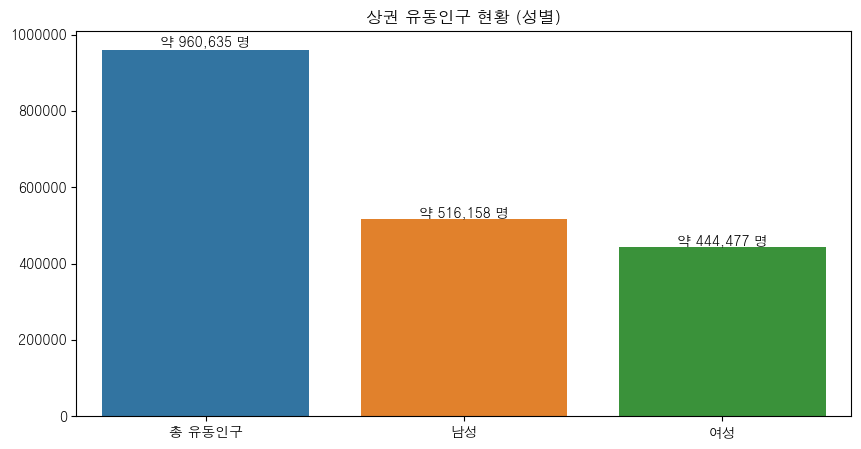

In [67]:
# 총 유동인구 및 성별 유동인구 (2020-2)

df_2020 = df_date[df_date['기준_년_코드'] == 2020]
df_2020_2 = df_2020[df_2020['기준_분기_코드'] == 2]

total = df_2020_2['총_유동인구_수']
men = df_2020_2['남성_유동인구_수']
women = df_2020_2['여성_유동인구_수']

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(['총 유동인구', '남성', '여성'], [total, men, women], ax = ax)
ax.set_title('상권 유동인구 현황 (성별)')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("약 {:,d} 명".format(int(height)), (left+width/2, height*1.01), ha='center')

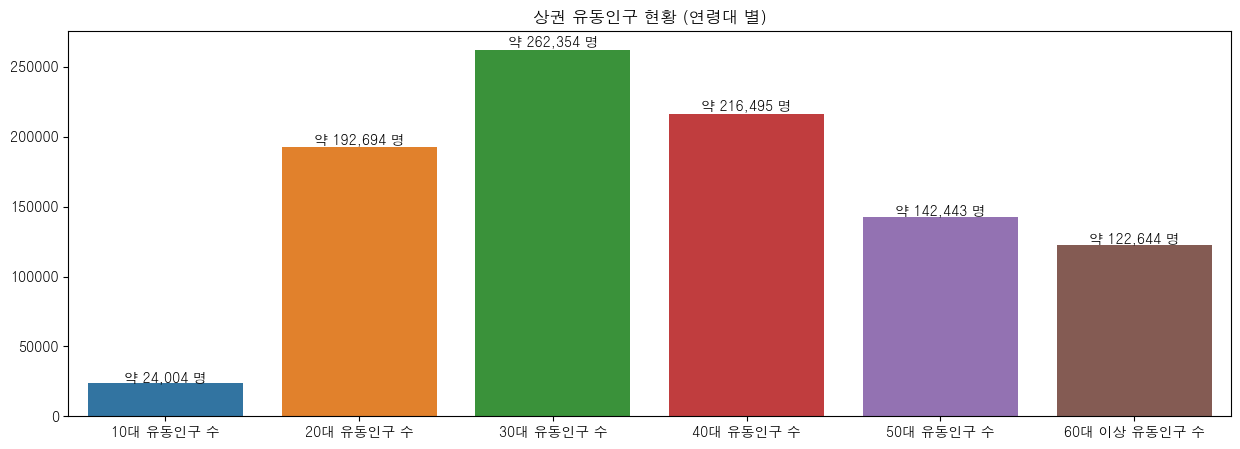

In [68]:
# 연령대별 유동인구 (2020-2)

df_2020 = df_date[df_date['기준_년_코드'] == 2020]
df_2020_2 = df_2020[df_2020['기준_분기_코드'] == 2]
a10 = df_2020_2['연령대_10_유동인구_수']
a20 = df_2020_2['연령대_20_유동인구_수']
a30 = df_2020_2['연령대_30_유동인구_수']
a40 = df_2020_2['연령대_40_유동인구_수']
a50 = df_2020_2['연령대_50_유동인구_수']
a60 = df_2020_2['연령대_60_이상_유동인구_수']

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(['10대 유동인구 수', '20대 유동인구 수',
       '30대 유동인구 수', '40대 유동인구 수', '50대 유동인구 수', '60대 이상 유동인구 수'], [a10, a20, a30, a40, a50, a60], ax = ax)
ax.set_title('상권 유동인구 현황 (연령대 별)')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("약 {:,d} 명".format(int(height)), (left+width/2, height*1.01), ha='center')

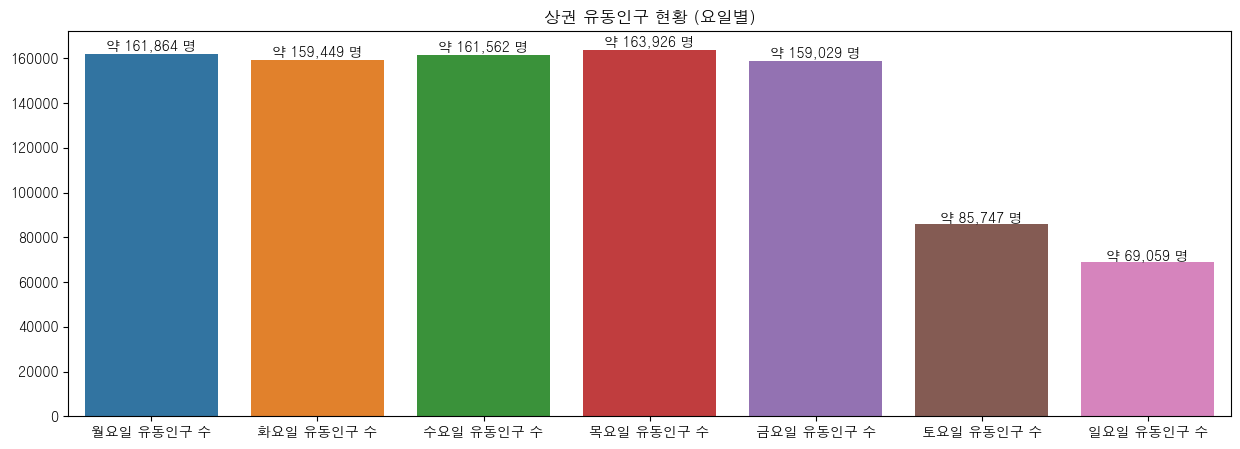

In [70]:
# 요일별 유동인구 (2020-2)

df_2020 = df_date[df_date['기준_년_코드'] == 2020]
df_2020_2 = df_2020[df_2020['기준_분기_코드'] == 2]
mon = df_2020_2['월요일_유동인구_수']
tue = df_2020_2['화요일_유동인구_수']
wed = df_2020_2['수요일_유동인구_수']
thu = df_2020_2['목요일_유동인구_수']
fri = df_2020_2['금요일_유동인구_수']
sat = df_2020_2['토요일_유동인구_수']
sun = df_2020_2['일요일_유동인구_수'] 

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(['월요일 유동인구 수', '화요일 유동인구 수',
       '수요일 유동인구 수', '목요일 유동인구 수', '금요일 유동인구 수', '토요일 유동인구 수', '일요일 유동인구 수'], [mon, tue, wed, thu, fri, sat, sun], ax = ax)
ax.set_title('상권 유동인구 현황 (요일별)')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("약 {:,d} 명".format(int(height)), (left+width/2, height*1.01), ha='center')

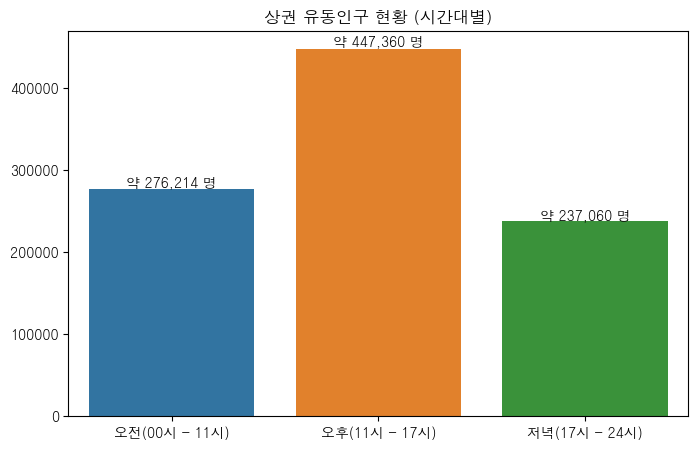

In [71]:
# 시간대별 유동인구 (2020-2)

df_2020 = df_date[df_date['기준_년_코드'] == 2020]
df_2020_2 = df_2020[df_2020['기준_분기_코드'] == 2]
t1 = df_2020_2['시간대_1_유동인구_수']
t2 = df_2020_2['시간대_2_유동인구_수']
t3 = df_2020_2['시간대_3_유동인구_수']
t4 = df_2020_2['시간대_4_유동인구_수']
t5 = df_2020_2['시간대_5_유동인구_수']
t6 = df_2020_2['시간대_6_유동인구_수']

t12 = t1 + t2
t34 = t3 + t4
t56 = t5 + t6

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(['오전(00시 - 11시)', '오후(11시 - 17시)', '저녁(17시 - 24시)'], [t12, t34, t56], ax = ax)
ax.set_title('상권 유동인구 현황 (시간대별)')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("약 {:,d} 명".format(int(height)), (left+width/2, height*1.01), ha='center')

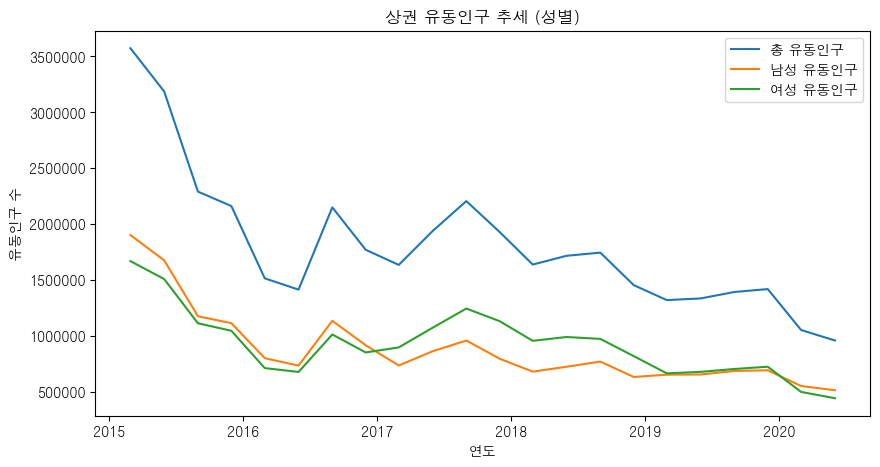

In [34]:
# 총 유동인구 및 성별 유동인구 변화 (2015-1 ~ 2020-2)

total = df_date['총_유동인구_수']
men = df_date['남성_유동인구_수']
women = df_date['여성_유동인구_수']

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = df_date.index, y = total, ax = ax, label = '총 유동인구')
sns.lineplot(x = df_date.index, y = men, ax = ax, label = '남성 유동인구')
sns.lineplot(x = df_date.index, y = women, ax = ax, label = '여성 유동인구')

ax.set_title('상권 유동인구 추세 (성별)')
ax.set_ylabel('유동인구 수')
ax.set_xlabel('연도')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("약 {:,d} 명".format(int(height)), (left+width/2, height*1.01), ha='center')

### (2) 집객 시설

In [21]:
df_facil.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2020,2,A,골목상권,1000054,녹사평대로46길,16,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0
1,2020,2,A,골목상권,1000055,대사관로34길,12,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2020,2,A,골목상권,1000056,두텁바위로1길,19,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0
3,2020,2,A,골목상권,1000057,백범로79길,12,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,2020,2,A,골목상권,1000058,백범로90길,7,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0


In [22]:
# 모든 column 확인

list(df_facil.columns)

['기준_년_코드',
 '기준_분기_코드',
 '상권_구분_코드',
 '상권_구분_코드_명',
 '상권_코드',
 '상권_코드_명',
 '집객시설_수',
 '관공서_수',
 '은행_수',
 '종합병원_수',
 '일반_병원_수',
 '약국_수',
 '유치원_수',
 '초등학교_수',
 '중학교_수',
 '고등학교_수',
 '대학교_수',
 '백화점_수',
 '슈퍼마켓_수',
 '극장_수',
 '숙박_시설_수',
 '공항_수',
 '철도_역_수',
 '버스_터미널_수',
 '지하철_역_수',
 '버스_정거장_수']

In [36]:
df_facil_new = df_facil.copy()
df_facil_new.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2020,2,A,골목상권,1000054,녹사평대로46길,16,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0
1,2020,2,A,골목상권,1000055,대사관로34길,12,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2020,2,A,골목상권,1000056,두텁바위로1길,19,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0
3,2020,2,A,골목상권,1000057,백범로79길,12,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,2020,2,A,골목상권,1000058,백범로90길,7,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0


In [42]:
# '명동거리'에 대해서만 추출

facil_m = df_facil_new[df_facil_new['상권_코드'] == 1001203].reset_index(drop = True)

# 결과 확인

facil_m

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2020,2,D,발달상권,1001203,명동거리,206,5.0,12.0,NaN,...,NaN,NaN,NaN,21.0,11.0,NaN,NaN,NaN,1.0,7.0
1,2020,1,D,발달상권,1001203,명동거리,206,5.0,12.0,NaN,...,NaN,NaN,NaN,21.0,11.0,NaN,NaN,NaN,1.0,7.0
2,2019,4,D,발달상권,1001203,명동거리,206,5.0,12.0,NaN,...,NaN,NaN,NaN,21.0,11.0,NaN,NaN,NaN,1.0,7.0
3,2019,3,D,발달상권,1001203,명동거리,206,5.0,12.0,NaN,...,NaN,NaN,NaN,21.0,11.0,NaN,NaN,NaN,1.0,7.0
4,2019,2,D,발달상권,1001203,명동거리,206,5.0,12.0,NaN,...,NaN,NaN,NaN,21.0,11.0,NaN,NaN,NaN,1.0,7.0
5,2019,1,D,발달상권,1001203,명동거리,206,5.0,12.0,NaN,...,NaN,NaN,NaN,21.0,11.0,NaN,NaN,NaN,1.0,7.0
6,2018,4,D,발달상권,1001203,명동거리,206,5.0,12.0,NaN,...,NaN,NaN,NaN,21.0,11.0,NaN,NaN,NaN,1.0,7.0
7,2018,3,D,발달상권,1001203,명동거리,206,5.0,12.0,NaN,...,NaN,NaN,NaN,21.0,11.0,NaN,NaN,NaN,1.0,7.0
8,2018,2,D,발달상권,1001203,명동거리,206,5.0,12.0,NaN,...,NaN,NaN,NaN,21.0,11.0,NaN,NaN,NaN,1.0,7.0
9,2018,1,D,발달상권,1001203,명동거리,206,5.0,12.0,NaN,...,NaN,NaN,NaN,21.0,11.0,NaN,NaN,NaN,1.0,7.0


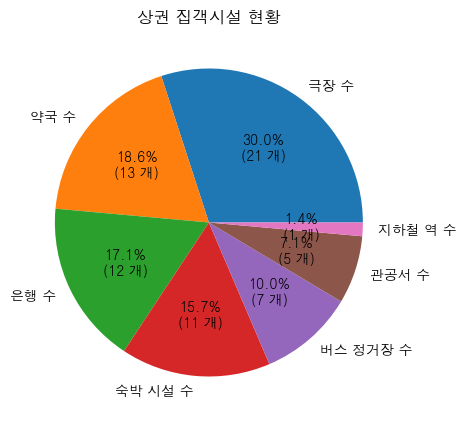

In [47]:
# 집객시설 파이차트 (2020-2)

import numpy as np

df_2020 = facil_m[facil_m['기준_년_코드'] == 2020]
df_2020_2 = df_2020[df_2020['기준_분기_코드'] == 2]
dff = df_2020_2.drop(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '집객시설_수'], axis = 1).fillna(0)
aa = pd.DataFrame()

for col in dff.columns:
    if int(dff[col]) == 0:
        continue
    else:  
        n = int(dff[col])
        word = col.replace('_', ' ')
        w_list = []
        w_list.append(word)
        ww = w_list*n
        aa = aa.append(ww)

fig, ax = plt.subplots(figsize=(5,5))
df = aa.loc[:,0].value_counts()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} 개)".format(pct, absolute)

df.plot.pie(title = '상권 집객시설 현황', autopct=lambda pct: func(pct, df), label = '')

### (3) 직장인구

In [48]:
df_work.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,2020,2,관광특구,1001496,강남 마이스 관광특구,15904,8904,7000,59,3513,...,3361,2887,1246,225,34,2353,2824,1361,350,78
1,2020,2,관광특구,1001495,잠실 관광특구,24375,14199,10176,120,4722,...,4186,3496,2297,1685,69,2238,2379,2121,2217,1152
2,2020,2,관광특구,1001494,종로?청계 관광특구,32935,17150,15785,68,5357,...,4911,4591,4158,1190,53,3072,5054,4892,2243,471
3,2020,2,관광특구,1001493,동대문패션타운 관광특구,6054,2958,3096,36,1434,...,737,662,600,403,23,891,958,498,461,265
4,2020,2,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,104830,53674,51156,423,27134,...,16080,15133,10824,2640,286,18274,17927,8251,4902,1516


In [49]:
# 모든 column 확인

list(df_work.columns)

['기준_년_코드',
 '기준_분기_코드',
 '상권_구분_코드_명',
 '상권_코드',
 '상권_코드_명',
 '총_직장_인구_수',
 '남성_직장_인구_수',
 '여성_직장_인구_수',
 '연령대_10_직장_인구_수',
 '연령대_20_직장_인구_수',
 '연령대_30_직장_인구_수',
 '연령대_40_직장_인구_수',
 '연령대_50_직장_인구_수',
 '연령대_60_이상_직장_인구_수',
 '남성연령대_10_직장_인구_수',
 '남성연령대_20_직장_인구_수',
 '남성연령대_30_직장_인구_수',
 '남성연령대_40_직장_인구_수',
 '남성연령대_50_직장_인구_수',
 '남성연령대_60_이상_직장_인구_수',
 '여성연령대_10_직장_인구_수',
 '여성연령대_20_직장_인구_수',
 '여성연령대_30_직장_인구_수',
 '여성연령대_40_직장_인구_수',
 '여성연령대_50_직장_인구_수',
 '여성연령대_60_이상_직장_인구_수']

In [51]:
# '명동거리'에 대해서만 추출

work_m = df_work[df_work['상권_코드'] == 1001203].reset_index(drop = True)

work_m = work_m.drop([22, 23, 24])

# 결과 확인

work_m

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,2020,2,발달상권,1001203,명동거리,8147,4244,3903,32,1358,...,976,1265,853,565,16,789,1148,1058,524,368
1,2020,1,발달상권,1001203,명동거리,8147,4244,3903,32,1358,...,976,1265,853,565,16,789,1148,1058,524,368
2,2019,4,발달상권,1001203,명동거리,8147,4244,3903,32,1358,...,976,1265,853,565,16,789,1148,1058,524,368
3,2019,3,발달상권,1001203,명동거리,33325,13963,19362,98,4294,...,2716,4062,4941,722,64,2806,6201,7208,2637,446
4,2019,2,발달상권,1001203,명동거리,33325,13963,19362,98,4294,...,2716,4062,4941,722,64,2806,6201,7208,2637,446
5,2019,1,발달상권,1001203,명동거리,17311,5640,11671,146,4090,...,1758,1161,731,655,86,2815,3418,3241,1645,466
6,2018,4,발달상권,1001203,명동거리,9026,4728,4298,34,1499,...,1216,1478,1070,470,19,1020,1249,921,829,260
7,2018,3,발달상권,1001203,명동거리,9026,4728,4298,34,1499,...,1216,1478,1070,470,19,1020,1249,921,829,260
8,2018,2,발달상권,1001203,명동거리,9026,4728,4298,34,1499,...,1216,1478,1070,470,19,1020,1249,921,829,260
9,2018,1,발달상권,1001203,명동거리,9708,5218,4490,75,1714,...,1357,1690,1047,489,53,1101,1339,986,774,237


In [52]:
# 시계열 lineplot을 위한 index 추가

year = list(work_m['기준_년_코드'])
month = list(work_m['기준_분기_코드'])

# (연도, 분기) list 생성
year_month = [i for i in zip(year,month)]
year_month

# '연도_분기' list 생성
# 1분기 = 3월 1일, 2분기 = 6월 1일, 3분기 = 9월 1일, 4분기 = 12월 1일
y_m = []
for i in range(len(year_month)):
    month = ''
    if int(year_month[i][1]) == 1:
        month = 3
    elif int(year_month[i][1]) == 2:
        month = 6
    elif int(year_month[i][1]) == 3:
        month = 9
    else :
        month = 12
    a = str(int(year_month[i][0])) + '-' + str(month) + '-1'
    y_m.append(a)
    
# 새로운 column 추가
df_date = work_m.copy()
df_date['Date'] = y_m
df_date['Date'] = df_date['Date'].astype('datetime64[ns]')
df_date = df_date.set_index('Date')
df_date

,기준_년_코드,기준_분기_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,2020,2,발달상권,1001203,명동거리,8147,4244,3903,32,1358,...,976,1265,853,565,16,789,1148,1058,524,368
2020-03-01,2020,1,발달상권,1001203,명동거리,8147,4244,3903,32,1358,...,976,1265,853,565,16,789,1148,1058,524,368
2019-12-01,2019,4,발달상권,1001203,명동거리,8147,4244,3903,32,1358,...,976,1265,853,565,16,789,1148,1058,524,368
2019-09-01,2019,3,발달상권,1001203,명동거리,33325,13963,19362,98,4294,...,2716,4062,4941,722,64,2806,6201,7208,2637,446
2019-06-01,2019,2,발달상권,1001203,명동거리,33325,13963,19362,98,4294,...,2716,4062,4941,722,64,2806,6201,7208,2637,446
2019-03-01,2019,1,발달상권,1001203,명동거리,17311,5640,11671,146,4090,...,1758,1161,731,655,86,2815,3418,3241,1645,466
2018-12-01,2018,4,발달상권,1001203,명동거리,9026,4728,4298,34,1499,...,1216,1478,1070,470,19,1020,1249,921,829,260
2018-09-01,2018,3,발달상권,1001203,명동거리,9026,4728,4298,34,1499,...,1216,1478,1070,470,19,1020,1249,921,829,260
2018-06-01,2018,2,발달상권,1001203,명동거리,9026,4728,4298,34,1499,...,1216,1478,1070,470,19,1020,1249,921,829,260


In [53]:
df_date.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '총_직장_인구_수',
       '남성_직장_인구_수', '여성_직장_인구_수', '연령대_10_직장_인구_수', '연령대_20_직장_인구_수',
       '연령대_30_직장_인구_수', '연령대_40_직장_인구_수', '연령대_50_직장_인구_수',
       '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수',
       '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수',
       '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수',
       '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수',
       '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

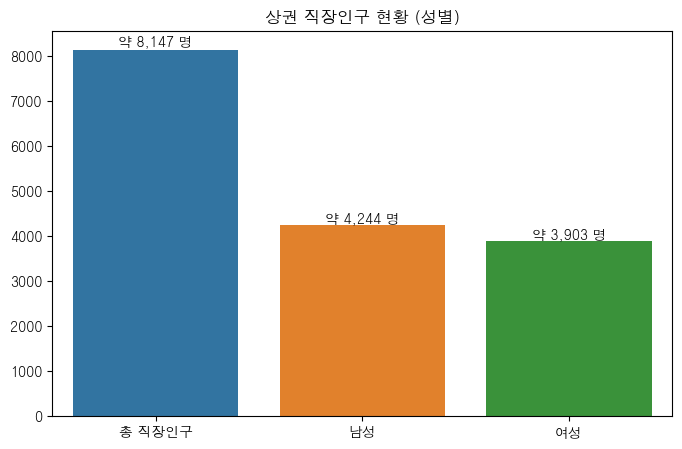

In [54]:
# 총 직장인구 및 성별 (2020-2)

df_2020 = df_date[df_date['기준_년_코드'] == 2020]
df_2020_2 = df_2020[df_2020['기준_분기_코드'] == 2]
total = df_2020_2['총_직장_인구_수']
men = df_2020_2['남성_직장_인구_수']
women = df_2020_2['여성_직장_인구_수']

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(['총 직장인구', '남성', '여성'], [total,men,women], ax = ax)
ax.set_title('상권 직장인구 현황 (성별)')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("약 {:,d} 명".format(int(height)), (left+width/2, height*1.01), ha='center')

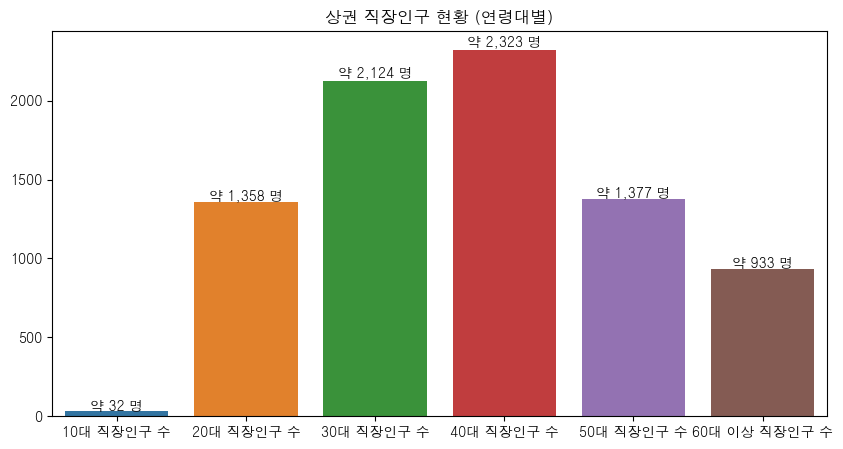

In [55]:
# 연령대별 직장인구 (2020-2)

df_2020 = df_date[df_date['기준_년_코드'] == 2020]
df_2020_2 = df_2020[df_2020['기준_분기_코드'] == 2]
t1 = df_2020_2['연령대_10_직장_인구_수']
t2 = df_2020_2['연령대_20_직장_인구_수']
t3 = df_2020_2['연령대_30_직장_인구_수']
t4 = df_2020_2['연령대_40_직장_인구_수']
t5 = df_2020_2['연령대_50_직장_인구_수']
t6 = df_2020_2['연령대_60_이상_직장_인구_수']


fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(['10대 직장인구 수', '20대 직장인구 수',
       '30대 직장인구 수', '40대 직장인구 수', '50대 직장인구 수',
       '60대 이상 직장인구 수'], [t1, t2, t3, t4, t5, t6], ax = ax)
ax.set_title('상권 직장인구 현황 (연령대별)')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("약 {:,d} 명".format(int(height)), (left+width/2, height*1.01), ha='center')

### (4) 상주인구

In [56]:
df_live.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,연령대 10 상주인구 수,연령대 20 상주인구 수,...,여성연령대 10 상주인구 수,여성연령대 20 상주인구 수,여성연령대 30 상주인구 수,여성연령대 40 상주인구 수,여성연령대 50 상주인구 수,여성연령대 60 이상 상주인구 수,총 가구 수,아파트 가구 수,비 아파트 가구 수,상권 코드 명
0,2020,2,U,관광특구,1001496,24,16,8,6,2,...,2,1,1,2,0,2,13,0,13,강남 마이스 관광특구
1,2020,2,U,관광특구,1001495,8221,3708,4513,822,1679,...,397,1040,1160,628,497,791,4837,0,4837,잠실 관광특구
2,2020,2,U,관광특구,1001494,1924,1274,650,49,195,...,21,60,65,64,130,310,1503,0,1503,종로?청계 관광특구
3,2020,2,U,관광특구,1001493,2427,1146,1281,169,505,...,97,312,290,179,178,225,1529,0,1529,동대문패션타운 관광특구
4,2020,2,U,관광특구,1001492,1104,401,703,15,51,...,12,26,54,120,149,342,510,0,510,명동 남대문 북창동 다동 무교동 관광특구


In [57]:
# 모든 column 확인

list(df_live.columns)

['기준_년_코드',
 '기준_분기_코드',
 '상권_구분_코드',
 '상권_구분_코드_명',
 '상권_코드',
 '총 상주인구 수',
 '남성 상주인구 수',
 '여성 상주인구 수',
 '연령대 10 상주인구 수',
 '연령대 20 상주인구 수',
 '연령대 30 상주인구 수',
 '연령대 40 상주인구 수',
 '연령대 50 상주인구 수',
 '연령대 60 이상 상주인구 수',
 '남성연령대 10 상주인구 수',
 '남성연령대 20 상주인구 수',
 '남성연령대 30 상주인구 수',
 '남성연령대 40 상주인구 수',
 '남성연령대 50 상주인구 수',
 '남성연령대 60 이상 상주인구 수',
 '여성연령대 10 상주인구 수',
 '여성연령대 20 상주인구 수',
 '여성연령대 30 상주인구 수',
 '여성연령대 40 상주인구 수',
 '여성연령대 50 상주인구 수',
 '여성연령대 60 이상 상주인구 수',
 '총 가구 수',
 '아파트 가구 수',
 '비 아파트 가구 수',
 '상권 코드 명']

In [59]:
# '명동거리'에 대해서만 추출

live_m = df_live[df_live['상권_코드'] == 1001203].reset_index(drop = True).drop('상권 코드 명', axis = 1)

live_m = live_m.drop([22, 23, 24])

# 결과 확인

live_m

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,연령대 10 상주인구 수,연령대 20 상주인구 수,...,남성연령대 60 이상 상주인구 수,여성연령대 10 상주인구 수,여성연령대 20 상주인구 수,여성연령대 30 상주인구 수,여성연령대 40 상주인구 수,여성연령대 50 상주인구 수,여성연령대 60 이상 상주인구 수,총 가구 수,아파트 가구 수,비 아파트 가구 수
0,2020,2,D,발달상권,1001203,138,84,54,5,17,...,28,4,9,4,8,14,15,107,0,107
1,2020,1,D,발달상권,1001203,138,84,54,5,17,...,28,4,9,4,8,14,15,107,0,107
2,2019,4,D,발달상권,1001203,138,84,54,5,17,...,28,4,9,4,8,14,15,107,0,107
3,2019,3,D,발달상권,1001203,139,81,58,6,17,...,23,4,10,6,10,14,14,102,0,102
4,2019,2,D,발달상권,1001203,139,81,58,6,17,...,23,4,10,6,10,14,14,102,0,102
5,2019,1,D,발달상권,1001203,139,81,58,6,17,...,23,4,10,6,10,14,14,102,0,102
6,2018,4,D,발달상권,1001203,139,81,58,6,17,...,23,4,10,6,10,14,14,102,0,102
7,2018,3,D,발달상권,1001203,144,83,61,4,19,...,22,4,11,8,9,13,16,112,0,112
8,2018,2,D,발달상권,1001203,144,83,61,4,19,...,22,4,11,8,9,13,16,112,0,112
9,2018,1,D,발달상권,1001203,42,20,22,2,3,...,7,1,2,2,4,1,12,24,0,24


In [60]:
# 시계열 lineplot을 위한 index 추가

year = list(live_m['기준_년_코드'])
month = list(live_m['기준_분기_코드'])

# (연도, 분기) list 생성
year_month = [i for i in zip(year,month)]
year_month

# '연도_분기' list 생성
# 1분기 = 3월 1일, 2분기 = 6월 1일, 3분기 = 9월 1일, 4분기 = 12월 1일
y_m = []
for i in range(len(year_month)):
    month = ''
    if int(year_month[i][1]) == 1:
        month = 3
    elif int(year_month[i][1]) == 2:
        month = 6
    elif int(year_month[i][1]) == 3:
        month = 9
    else :
        month = 12
    a = str(int(year_month[i][0])) + '-' + str(month) + '-1'
    y_m.append(a)
    
# 새로운 column 추가
df_date = live_m.copy()
df_date['Date'] = y_m
df_date['Date'] = df_date['Date'].astype('datetime64[ns]')
df_date = df_date.set_index('Date')
df_date

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,연령대 10 상주인구 수,연령대 20 상주인구 수,...,남성연령대 60 이상 상주인구 수,여성연령대 10 상주인구 수,여성연령대 20 상주인구 수,여성연령대 30 상주인구 수,여성연령대 40 상주인구 수,여성연령대 50 상주인구 수,여성연령대 60 이상 상주인구 수,총 가구 수,아파트 가구 수,비 아파트 가구 수
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,2020,2,D,발달상권,1001203,138,84,54,5,17,...,28,4,9,4,8,14,15,107,0,107
2020-03-01,2020,1,D,발달상권,1001203,138,84,54,5,17,...,28,4,9,4,8,14,15,107,0,107
2019-12-01,2019,4,D,발달상권,1001203,138,84,54,5,17,...,28,4,9,4,8,14,15,107,0,107
2019-09-01,2019,3,D,발달상권,1001203,139,81,58,6,17,...,23,4,10,6,10,14,14,102,0,102
2019-06-01,2019,2,D,발달상권,1001203,139,81,58,6,17,...,23,4,10,6,10,14,14,102,0,102
2019-03-01,2019,1,D,발달상권,1001203,139,81,58,6,17,...,23,4,10,6,10,14,14,102,0,102
2018-12-01,2018,4,D,발달상권,1001203,139,81,58,6,17,...,23,4,10,6,10,14,14,102,0,102
2018-09-01,2018,3,D,발달상권,1001203,144,83,61,4,19,...,22,4,11,8,9,13,16,112,0,112
2018-06-01,2018,2,D,발달상권,1001203,144,83,61,4,19,...,22,4,11,8,9,13,16,112,0,112


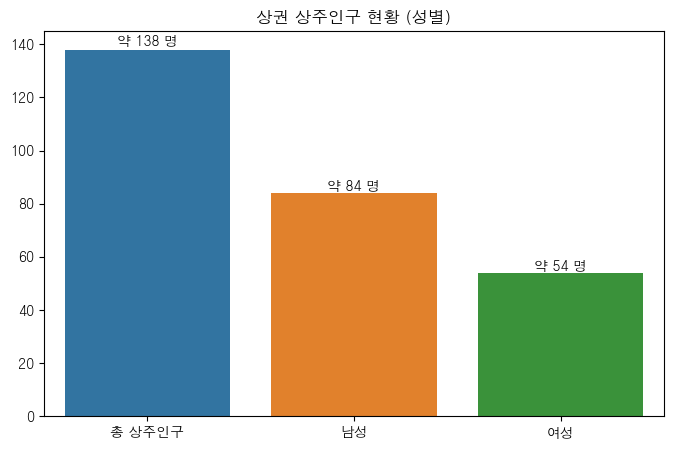

In [61]:
# 총 상주인구 및 성별 (2020-2)

df_2020 = df_date[df_date['기준_년_코드'] == 2020]
df_2020_2 = df_2020[df_2020['기준_분기_코드'] == 2]
total = df_2020_2['총 상주인구 수']
men = df_2020_2['남성 상주인구 수']
women = df_2020_2['여성 상주인구 수']

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(['총 상주인구', '남성', '여성'], [total, men, women], ax = ax)
ax.set_title('상권 상주인구 현황 (성별)')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("약 {:,d} 명".format(int(height)), (left+width/2, height*1.01), ha='center')

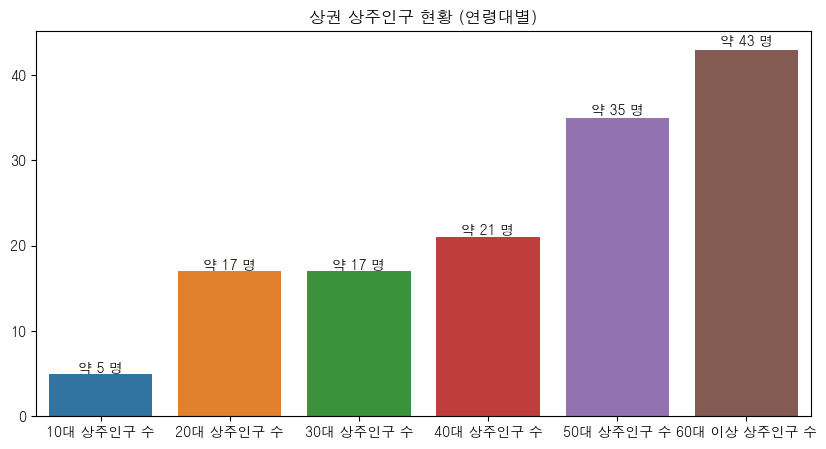

In [62]:
# 연령대별 직장인구 (2020-2)

df_2020 = df_date[df_date['기준_년_코드'] == 2020]
df_2020_2 = df_2020[df_2020['기준_분기_코드'] == 2]
a10 = df_2020_2['연령대 10 상주인구 수']
a20 = df_2020_2['연령대 20 상주인구 수']
a30 = df_2020_2['연령대 30 상주인구 수']
a40 = df_2020_2['연령대 40 상주인구 수']
a50 = df_2020_2['연령대 50 상주인구 수']
a60 = df_2020_2['연령대 60 이상 상주인구 수']


fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(['10대 상주인구 수', '20대 상주인구 수',
       '30대 상주인구 수', '40대 상주인구 수', '50대 상주인구 수',
       '60대 이상 상주인구 수'], [a10, a20, a30, a40, a50, a60], ax = ax)
ax.set_title('상권 상주인구 현황 (연령대별)')

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("약 {:,d} 명".format(int(height)), (left+width/2, height*1.01), ha='center')